In [13]:
import numpy as np 
import pandas as pd 
from skimage.data import imread
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2

In [14]:
import os
print(os.listdir("C:\ASD"))
os.listdir("C:\ASD")


['sample_submission_v2.csv', 'test_v2', 'train_ship_segmentations.csv', 'train_ship_segmentations_v2.csv', 'train_v2']


['sample_submission_v2.csv',
 'test_v2',
 'train_ship_segmentations.csv',
 'train_ship_segmentations_v2.csv',
 'train_v2']

In [15]:
# set images to bigger size
mpl.rcParams['figure.figsize'] = [8.0, 8.0]

In [16]:
ImageId = '002fdcf51.jpg'
img = imread('C:/ASD/train_v2/' + ImageId)
masks = pd.read_csv("train_ship_segmentations_v2.csv", index_col="ImageId")

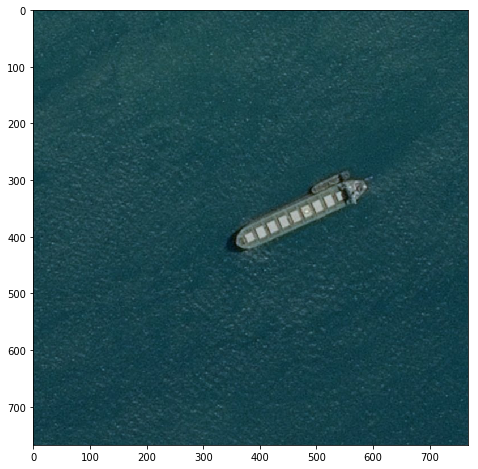

In [17]:
plt.imshow(img)
plt.show()

In [18]:
def rle_decode(mask_rle, shape):
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

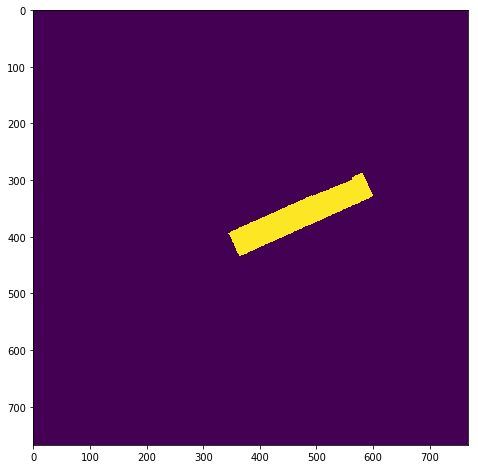

In [19]:
rle_mask = masks.EncodedPixels[ImageId].tolist()[1] # this image has two ships, we'll use bigger one
mask = rle_decode(rle_mask, (768, 768))
plt.imshow(mask)
plt.show()

x:345, y:287, width:256, height:148


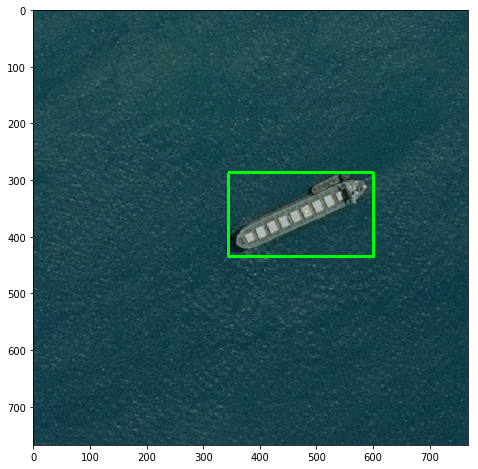

In [20]:
x, y, w, h = cv2.boundingRect(mask)
rect1 = cv2.rectangle(img.copy(),(x,y),(x+w,y+h),(0,255,0),3) # not copying here will throw an error
print("x:{0}, y:{1}, width:{2}, height:{3}".format(x, y, w, h))
plt.imshow(rect1)
plt.show()